<a href="https://colab.research.google.com/github/VickkiMars/AI-ML/blob/main/upscaling_image_using_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import cv2

In [8]:
x = cv2.imread('car1.jpeg')
x = cv2.resize(x, (100,100), interpolation=cv2.INTER_CUBIC)
x = np.array(x)
x = x.flatten()
x = x.reshape((-1,1))

In [9]:
y = cv2.imread('car3.jpg')
y = cv2.resize(y, (100,100), interpolation=cv2.INTER_CUBIC)
y = np.array(y)
y = y.flatten()
y = y.reshape((-1,1))

In [10]:
assert x.shape == y.shape

In [11]:
x.shape, y.shape

((30000, 1), (30000, 1))

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_shape=[1], activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(
    optimizer='adam',
    loss='mean_squared_error'
)

history = model.fit(x,y, epochs=200)

Epoch 1/200
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1022.1780
Epoch 2/200
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 211.3732
Epoch 3/200
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 202.9678
Epoch 4/200
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 211.0319
Epoch 5/200
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 213.6598
Epoch 6/200
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 218.0720
Epoch 7/200
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 208.1844
Epoch 8/200
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 208.8098
Epoch 9/200
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 218.8458
Epoch 10/200
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 216.2792
Epoch 11/200
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 209.4507
Epoch 12/200
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 208.4820
Epoch 13/200
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 219.6023
Epoch 14/200
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 201.2679
Epoch 15/200
9

KeyboardInterrupt: 

In [39]:
import random
arr_x, arr_y = [], []
for i in range(29000):
  ch = random.randint(0,x.shape[0]-1)
  arr_x.append(x[ch]); arr_y.append(y[ch])

def plot_random(x,y):
  plt.figure(figsize=(20,10))
  plt.subplot(1,2,1)
  plt.scatter(arr_x, arr_y)
  plt.subplot(1,2,2)
  plt.plot(y)
  plt.show()

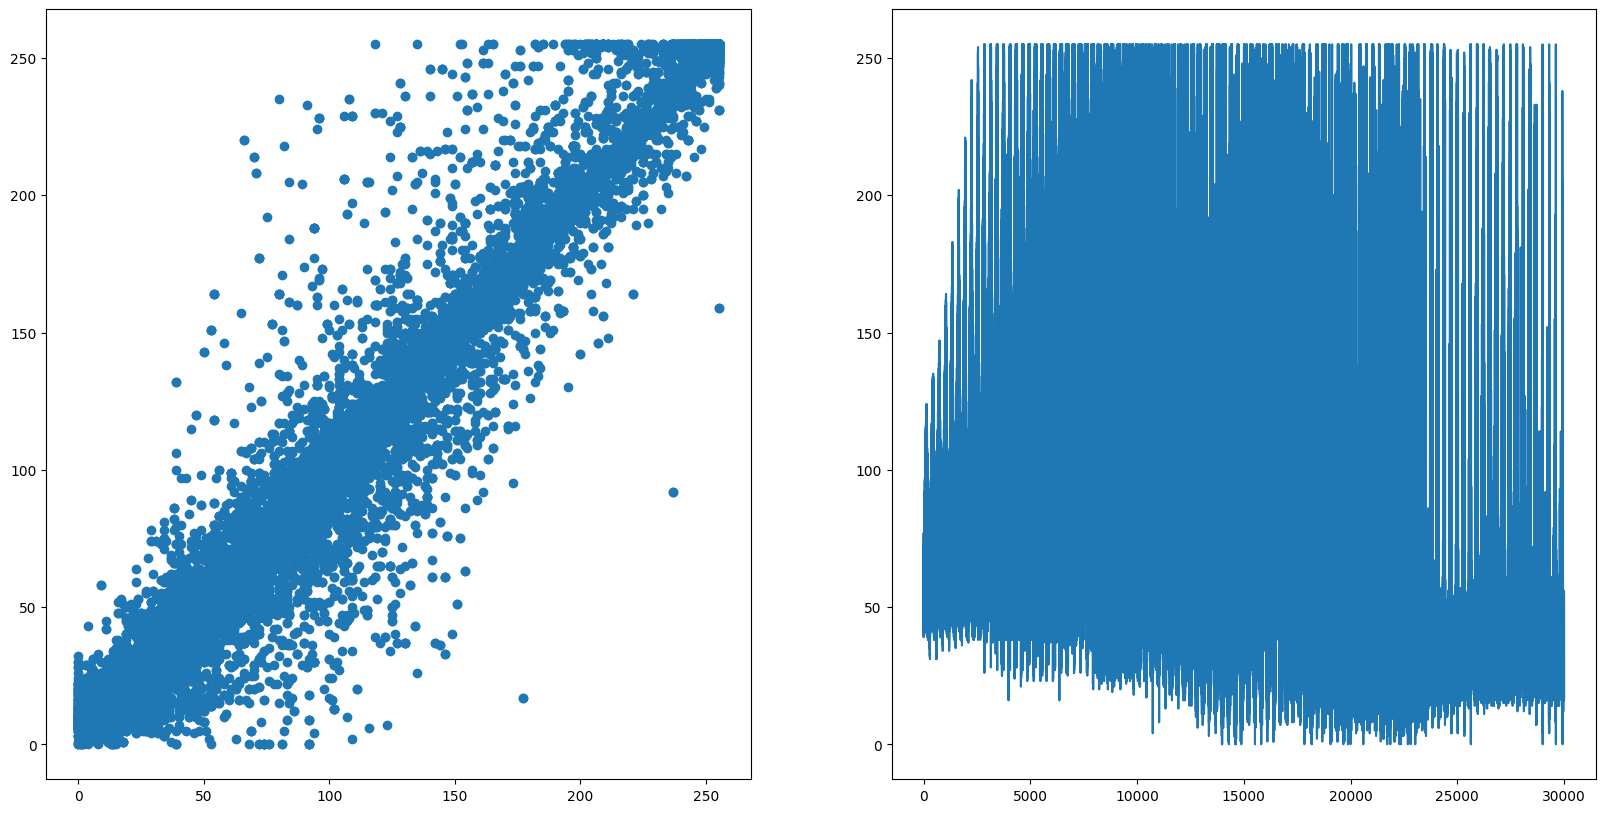

In [40]:
plot_random(x,y)